# Setup Spark environment 

In [ ]:
import time
import os

Start=time.time()
# Download and install tools 

# Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download and Install Spark
!wget  -q http://apache.osuosl.org/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz

# Install findspark
!pip install -q findspark

# Set environment variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"
import findspark
findspark.init()

print(f"\nIt took {(time.time()-Start)} seconds to install all dependencies for spark to run on Google Colab. \n")



It took 110.19643139839172 seconds to install all dependencies for spark to run on Google Colab. 



# All files present in the data/mllib folder



- Spark ships with a good number of test data sets that can be used for all kinds of training and testing.

- This data can be explored by browsing to the installation path of Spark and checking out the folder marked `data`. 

In [ ]:
from pathlib import Path
from IPython.display import HTML

PATH = "/content/spark-2.4.7-bin-hadoop2.7/data/mllib"

files = [str(x).replace(PATH + "/", "") for x in Path(PATH).glob("**/*") if x.is_file()]
files.sort()
folders = [
    f"<font color='rgba(0, 0, 0, 87)' size='1'>{'/'.join(f.split('/')[:-1])}/</font>"  # folder part
    f"{f.split('/')[-1]}"  # file part
    for f in files
    if "/" in f
]
files = folders + [f for f in files if "/" not in f]

HTML(
    f"<font face='courier' size='2'>"
    f"<strong>All files present in the data/mllib folder:</strong><br />"
    f"{''.join([f'<li>{str(f)}</li>' for f in files])}"
    f"</font>"
)



# Regression

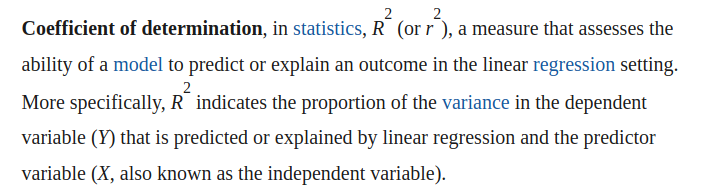

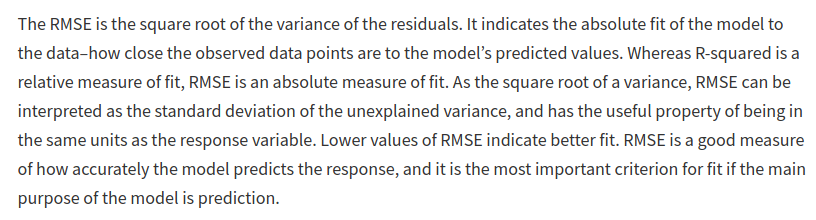

## Linear regression 

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator


# Load training data
PATH = "/content/spark-2.4.7-bin-hadoop2.7/data/mllib/sample_libsvm_data.txt"
data = spark.read.format("libsvm").load(PATH)


# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

lr = LinearRegression(maxIter=10, regParam=0.25, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(trainingData)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print(f"numIterations: {trainingSummary.totalIterations}")
print(f"objectiveHistory: {str(trainingSummary.objectiveHistory)}")
trainingSummary.residuals.show()
print(f"RMSE [Training] = {trainingSummary.rootMeanSquaredError}")
print(f"r2 [Training] = {trainingSummary.r2}")


# Make predictions.
predictions = lrModel.transform(testData)

# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator_rmse = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")

rmse = evaluator_rmse.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)
print(f"RMSE [Testig] = {rmse}")
print(f"r2 [Testig] = {r2}")



Coefficients: [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.473457614936165e-06,0.0,0.0,0.0,0.0,0.0,0.

## Decision Tree regression 

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator


# Load training data
PATH = "/content/spark-2.4.7-bin-hadoop2.7/data/mllib/sample_libsvm_data.txt"
data = spark.read.format("libsvm").load(PATH)


# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

DT = DecisionTreeRegressor()

# Fit the model
DTModel = DT.fit(trainingData)


# Summarize the model over the training set and print out some metrics
# Select example rows to display.
predictions_train = DTModel.transform(trainingData)

predictions_train.select("prediction", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator_rmse = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")

rmse = evaluator_rmse.evaluate(predictions_train)
r2 = evaluator_r2.evaluate(predictions_train)
print(f"RMSE [Training] = {rmse}")
print(f"r2 [Training] = {r2}")



# Make predictions.
predictions = DTModel.transform(testData)

# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator_rmse = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")

rmse = evaluator_rmse.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)
print(f"RMSE [Testig] = {rmse}")
print(f"r2 [Testig] = {r2}")



+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  0.0|(692,[95,96,97,12...|
|       0.0|  0.0|(692,[100,101,102...|
|       0.0|  0.0|(692,[122,123,148...|
|       0.0|  0.0|(692,[123,124,125...|
|       0.0|  0.0|(692,[123,124,125...|
+----------+-----+--------------------+
only showing top 5 rows

RMSE [Training] = 0.0
r2 [Training] = 1.0
+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       1.0|  0.0|(692,[98,99,100,1...|
|       0.0|  0.0|(692,[121,122,123...|
|       0.0|  0.0|(692,[122,123,124...|
|       0.0|  0.0|(692,[124,125,126...|
|       0.0|  0.0|(692,[126,127,128...|
+----------+-----+--------------------+
only showing top 5 rows

RMSE [Testig] = 0.28284271247461906
r2 [Testig] = 0.5614035087719297


## Random Forest regression 

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator


# Load training data
PATH = "/content/spark-2.4.7-bin-hadoop2.7/data/mllib/sample_libsvm_data.txt"
data = spark.read.format("libsvm").load(PATH)


# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

RF = RandomForestRegressor()

# Fit the model
RFModel = RF.fit(trainingData)


# Summarize the model over the training set and print out some metrics
# Select example rows to display.
predictions_train = RFModel.transform(trainingData)

predictions_train.select("prediction", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator_rmse = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")

rmse = evaluator_rmse.evaluate(predictions_train)
r2 = evaluator_r2.evaluate(predictions_train)
print(f"RMSE [Training] = {rmse}")
print(f"r2 [Training] = {r2}")



# Make predictions.
predictions = RFModel.transform(testData)

# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator_rmse = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")

rmse = evaluator_rmse.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)
print(f"RMSE [Testig] = {rmse}")
print(f"r2 [Testig] = {r2}")



+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  0.0|(692,[98,99,100,1...|
|       0.0|  0.0|(692,[121,122,123...|
|       0.0|  0.0|(692,[122,123,124...|
|      0.05|  0.0|(692,[123,124,125...|
|       0.0|  0.0|(692,[123,124,125...|
+----------+-----+--------------------+
only showing top 5 rows

RMSE [Training] = 0.0555174907648204
r2 [Training] = 0.9873847926267281
+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|      0.05|  0.0|(692,[95,96,97,12...|
|      0.45|  0.0|(692,[100,101,102...|
|       0.1|  0.0|(692,[122,123,148...|
|       0.0|  0.0|(692,[123,124,125...|
|       0.0|  0.0|(692,[124,125,126...|
+----------+-----+--------------------+
only showing top 5 rows

RMSE [Testig] = 0.12285191326386656
r2 [Testig] = 0.938875


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator


# Load training data
PATH = "/content/spark-2.4.7-bin-hadoop2.7/data/mllib/sample_libsvm_data.txt"
data = spark.read.format("libsvm").load(PATH)


# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

GB = GBTRegressor()

# Fit the model
GBModel = GB.fit(trainingData)


# Summarize the model over the training set and print out some metrics
# Select example rows to display.
predictions_train = GBModel.transform(trainingData)

predictions_train.select("prediction", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator_rmse = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")

rmse = evaluator_rmse.evaluate(predictions_train)
r2 = evaluator_r2.evaluate(predictions_train)
print(f"RMSE [Training] = {rmse}")
print(f"r2 [Training] = {r2}")



# Make predictions.
predictions = GBModel.transform(testData)

# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator_rmse = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")

rmse = evaluator_rmse.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)
print(f"RMSE [Testig] = {rmse}")
print(f"r2 [Testig] = {r2}")



+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  0.0|(692,[95,96,97,12...|
|       0.0|  0.0|(692,[98,99,100,1...|
|       0.0|  0.0|(692,[100,101,102...|
|       0.0|  0.0|(692,[122,123,124...|
|       0.0|  0.0|(692,[122,123,148...|
+----------+-----+--------------------+
only showing top 5 rows

RMSE [Training] = 0.0
r2 [Training] = 1.0
+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  0.0|(692,[121,122,123...|
|       0.0|  0.0|(692,[123,124,125...|
|       0.0|  0.0|(692,[124,125,126...|
|       0.0|  0.0|(692,[124,125,126...|
|       0.0|  0.0|(692,[124,125,126...|
+----------+-----+--------------------+
only showing top 5 rows

RMSE [Testig] = 0.26261286571944514
r2 [Testig] = 0.721153846153846
